In [1]:
from collections import defaultdict, Counter
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
data = \
[[['крамолина', 'слуга'],
  ['крамолина', 'кокуркина', 'слуга'],
  ['крамолина', 'лопырев', 'слуга'],
  ['вермутская', 'крамолина', 'лопырев', 'слуга'],
  ['вермутская', 'крамолина', 'слуга'],
  ['крамолина', 'кокуркина'],
  ['крамолина', 'чаганов', 'слуга'],
  ['слетышев', 'кокуркина', 'слуга'],
  ['слетышев'],
  ['крамолина', 'слетышев'],
  ['крамолина', 'слетышев', 'вермутская'],
  ['крамолина', 'слетышев', 'вермутская', 'лопырев', 'слуга']],
 [['вера', 'дуня'],
  ['вера', 'дуня', 'пырешева', 'дементий'],
  ['пырешева', 'запольев'],
  ['запольев', 'вера', 'дементий'],
  ['запольев', 'чаганов'],
  ['запольев', 'чаганов', 'вера'],
  ['запольев', 'чаганов', 'вера', 'пырешева', 'дементий'],
  ['дементий', 'слетышев'],
  ['слетышев', 'чаганов']],
 [['чаганов', 'муравин', 'громчевский', 'кинин'],
  ['чаганов', 'муравин', 'громчевский', 'кинин', 'слетышев'],
  ['чаганов', 'муравин', 'громчевский', 'кинин', 'слетышев', 'василий'],
  ['слетышев', 'чаганов', 'муравин'],
  ['муравин', 'слетышев'],
  ['муравин', 'слетышев', 'паганов'],
  ['муравин', 'слетышев', 'паганов', 'василий', 'вера'],
  ['слетышев', 'кинин', 'громчевский'],
  ['слетышев', 'кинин', 'громчевский', 'чаганов', 'вера', 'муравин'],
  ['слетышев', 'кинин', 'громчевский', 'чаганов', 'вера', 'муравин', 'крамолина']],
 [['катя', 'вера'],
  ['кинин', 'вера'],
  ['кинин', 'катя', 'запольев'],
  ['запольев', 'вера'],
  ['вера', 'катя', 'чаганов'],
  ['чаганов', 'слетышев'],
  ['слетышев', 'вера']],
 [['крамолина', 'кинин'],
  ['крамолина', 'кокуркина', 'слуга'],
  ['крамолина', 'лопырев'],
  ['крамолина', 'слуга'],
  ['крамолина', 'вермутская', 'кокуркина', 'слуга'],
  ['кокуркина', 'слуга'],
  ['кокуркина', 'чаганов', 'слуга'],
  ['чаганов', 'крамолина', 'вера', 'слетышев', 'слуга'],
  ['чаганов', 'крамолина', 'вера', 'слетышев', 'слуга', 'околодочный']]]


## Матрица

In [3]:
drama_heroes = [hero for act in data for scene in act for hero in scene]
drama_heroes = list(sorted(set(drama_heroes)))
matrices = [np.array([[1 if hero in scene else 0 for scene in act] for hero in drama_heroes]) for act in data]

In [4]:
def rome(dec):
    return {1: 'I', 2: 'II', 3: 'III', 4: 'IV', 5: 'V', 6: 'VI'}[dec]

def col(act, scene):
    return rome(act) + '.' + str(scene)

def cols():
    return [col(n_act+1, n_scene+1) for n_act, act in enumerate(matrices) for n_scene in range(len(act[0]))]

matrix = np.hstack(matrices)
pd.DataFrame(matrix, index=drama_heroes, columns=cols())

,I.1,I.2,I.3,I.4,I.5,I.6,I.7,I.8,I.9,I.10,I.11,I.12,II.1,II.2,II.3,II.4,II.5,II.6,II.7,II.8,II.9,III.1,III.2,III.3,III.4,III.5,III.6,III.7,III.8,III.9,III.10,IV.1,IV.2,IV.3,IV.4,IV.5,IV.6,IV.7,V.1,V.2,V.3,V.4,V.5,V.6,V.7,V.8,V.9
василий,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
вера,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1
вермутская,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
громчевский,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
дементий,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
дуня,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
запольев,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
катя,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
кинин,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
кокуркина,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0


## Мобильность

In [5]:
def mob(mat):
    return (np.sum(np.abs(mat[:, 1:] - mat[:, :-1]), axis=1) - 1) / (len(mat[0])-1)

index = list(range(1, len(matrices) + 1)) + ['пьеса']
mobility = list(map(mob, matrices + [matrix]))
mobility = pd.DataFrame(mobility, index=index, columns=drama_heroes).round(2).transpose()
mobility[mobility < 0] = ''
mobility

,1,2,3,4,5,пьеса
василий,,,0.33,,,0.07
вера,,0.5,0.22,0.5,0,0.30
вермутская,0.18,,,,0.12,0.11
громчевский,,,0.11,,,0.07
дементий,,0.62,,,,0.11
дуня,,0,,,,0.02
запольев,,0.12,,0.17,,0.07
катя,,,,0.67,,0.11
кинин,,,0.11,0.17,0,0.15
кокуркина,0.45,,,,0.38,0.20


## Плотность

In [6]:
def dens(matrix):
#     print(np.count_nonzero(matrix), '/', matrix.size, sep='', end=', ')
    return np.count_nonzero(matrix)/matrix.size

In [7]:
print('Плотность всей пьесы:', round(dens(matrix), 2))

act_d = list(map(dens, matrices))
act_d_ = np.array(act_d).reshape(-1, 1)
scene_d = [[dens(c) for c in m.T] for m in matrices]
scene_d_ = pd.DataFrame(scene_d).values # to fill with nans
columns = list(range(1, len(scene_d_[0]) + 1)) + ['действия']
index = list(range(1, len(data)+1))
density = pd.DataFrame(np.hstack((scene_d_, act_d_)), columns=columns, index=index)
density.round(2).fillna('')

Плотность всей пьесы: 0.17


,1,2,3,4,5,6,7,8,9,10,11,12,действия
1,0.11,0.16,0.16,0.21,0.16,0.11,0.16,0.16,0.05,0.11,0.16,0.26,0.15
2,0.11,0.21,0.11,0.16,0.11,0.16,0.26,0.11,0.11,,,,0.15
3,0.21,0.26,0.32,0.16,0.11,0.16,0.26,0.16,0.32,0.37,,,0.23
4,0.11,0.11,0.16,0.11,0.16,0.11,0.11,,,,,,0.12
5,0.11,0.16,0.11,0.11,0.21,0.11,0.16,0.26,0.32,,,,0.17


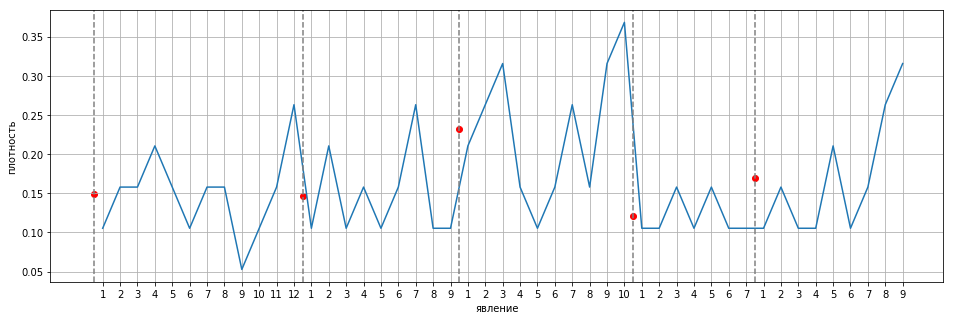

In [8]:
from itertools import accumulate

plt.subplots(figsize=(16, 5));

flat = [tup for act in scene_d for tup in enumerate(act, start=1)]
ticks, values = zip(*flat)
plt.plot(values);
plt.xticks(range(len(ticks)), ticks);

borders = np.array(list(accumulate(map(len, [[]] + scene_d))))
plt.scatter(borders[:-1]-0.5, act_d, c='red');
for x in borders[:-1]:
    plt.axvline(x-0.5, c='gray', ls='--');
    
plt.xlabel('явление');
plt.ylabel('плотность');
plt.grid();

## Расстояние

In [9]:
def dist(mat):
    n = len(drama_heroes)
    dist = np.zeros((n, n))*np.nan
    for i in range(n-1):
        for j in range(i+1, n):
            if np.sum(mat[i]) != 0 and np.sum(mat[j]) != 0:
                dist[i][j] = dist[j][i] = np.sum(np.abs(mat[i] - mat[j]))
    return dist/len(mat[0])

In [10]:
act_d = [dist(m) for m in matrices]
drama_d = dist(matrix)

In [11]:
distances = [pd.DataFrame(d, index=drama_heroes, columns=drama_heroes).stack() for d in act_d + [drama_d]]
distances = pd.concat(distances, axis=1)
distances.columns = list(range(1, len(act_d) + 1)) + ['пьеса']
distances.round(2).fillna('')

1     2    3     4     5  пьеса
василий     вера                     0.3               0.32
            вермутская                                 0.15
            громчевский              0.6               0.13
            дементий                                   0.13
            дуня                                       0.09
            запольев                                   0.19
            катя                                       0.11
            кинин                    0.6               0.19
            кокуркина                                  0.19
            крамолина                0.3               0.43
            лопырев                                    0.13
            муравин                  0.7               0.15
            околодочный                                0.06
            паганов                  0.2               0.04
            пырешева                                   0.11
            слетышев                 0.7               0.38
            слуга                                      0.36
            чаганов                  0.6               0.34
вера        василий                  0.3               0.32
            вермутская                          0.33   0.43
            громчевский              0.5               0.36
            дементий           0.33                    0.28
            дуня               0.33                    0.28
            запольев           0.44       0.71         0.30
            катя                          0.57         0.30
            кинин                    0.5  0.71  0.33   0.38
            кокуркина                           0.67   0.47
            крамолина                0.2        0.56   0.57
            лопырев                             0.33   0.40
            муравин                  0.6               0.38
            околодочный                         0.11   0.30
            паганов                  0.3               0.32
            пырешева           0.44                    0.30
            слетышев           0.78  0.6  0.71     0   0.49
            слуга                               0.56   0.55
            чаганов            0.56  0.5  0.71  0.11   0.36
вермутская  василий                                    0.15
            вера                                0.33   0.43
            громчевский                                0.23
            дементий                                   0.19
            дуня                                       0.15
            запольев                                   0.26
            катя                                       0.17
            кинин                               0.22   0.30
            кокуркина    0.58                   0.33   0.21
            крамолина     0.5                   0.67   0.28
            лопырев      0.25                   0.22   0.11
            муравин                                    0.30
            околодочный                         0.22   0.13
            паганов                                    0.15
            пырешева                                   0.17
            слетышев     0.42                   0.33   0.45
            слуга         0.5                   0.67   0.26
            чаганов      0.42                   0.44   0.45
громчевский василий                  0.6               0.13
            вера                     0.5               0.36
            вермутская                                 0.23
            дементий                                   0.21
            дуня                                       0.17
            запольев                                   0.28
            катя                                       0.19
            кинин                      0               0.06
            кокуркина                                  0.28
            крамолина                0.5               0.47
            лопырев                                    0.21
            муравин                  0.5               0.11
        

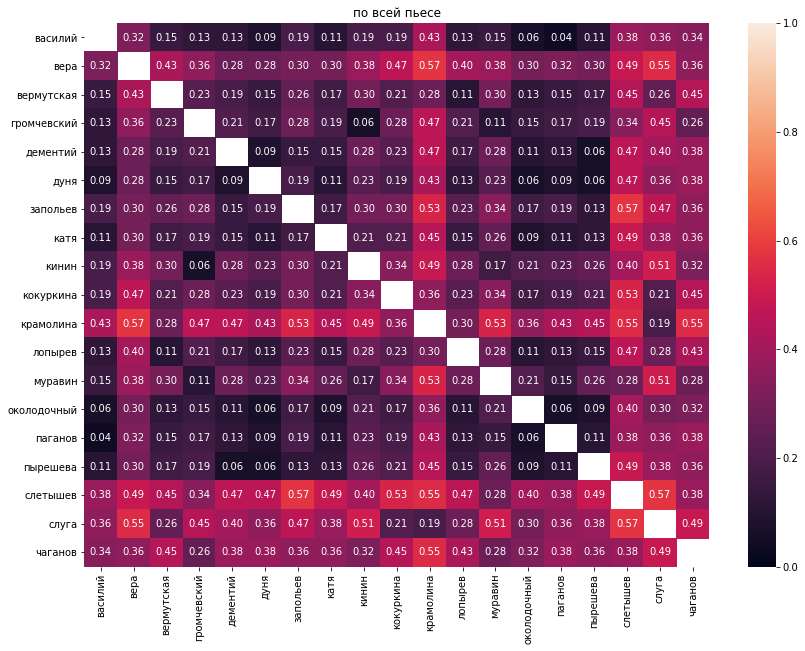

In [12]:
plt.subplots(figsize=(14, 10))
sns.heatmap(drama_d, vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
plt.title('по всей пьесе');

## Абстрактные типы отношений (= соп., <> альт., > или < дом.)

In [13]:
for i, j in zip(*np.where(drama_d == 0)):
    if i != j and i < j:
        p = np.sum(matrix[i])
        q = np.sum(matrix[j])
        s = '=' if p == q else ('>' if p > q else '<')
        print(drama_heroes[i], s, drama_heroes[j])

## Ранг

In [14]:
rank = [np.sum(np.sum(matrix, axis=0)[np.where(matrix[i] != 0)[0]] - 1) for i in range(len(drama_heroes))]
df = pd.DataFrame(dict(zip(drama_heroes, rank)), index=['ранг']).sort_values(by='ранг', axis=1, ascending=False)

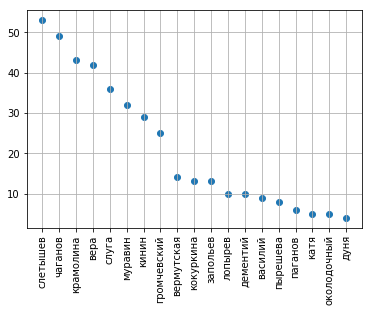

In [15]:
plt.scatter(range(len(drama_heroes)), df.values);
plt.xticks(range(len(drama_heroes)), df.columns, rotation=90);
plt.grid();

## Абсолютные относительные частоты

In [16]:
def freq(mat):
    return np.sum(mat, axis=1)/len(mat[0])

index = list(range(1, len(matrices) + 1)) + ['пьеса']
freq_abs = list(map(freq, matrices + [matrix]))
freq_abs = pd.DataFrame(freq_abs, index=index, columns=drama_heroes).round(2).transpose()
freq_abs[freq_abs == 0] = ''
freq_abs.sort_values(by='пьеса', ascending=False)

,1,2,3,4,5,пьеса
слетышев,0.42,0.22,0.9,0.29,0.22,0.43
крамолина,0.83,,0.1,,0.78,0.38
чаганов,0.08,0.44,0.6,0.29,0.33,0.34
слуга,0.67,,,,0.78,0.32
вера,,0.56,0.3,0.71,0.22,0.32
кинин,,,0.6,0.29,0.11,0.19
муравин,,,0.9,,,0.19
кокуркина,0.25,,,,0.44,0.15
запольев,,0.56,,0.29,,0.15
громчевский,,,0.6,,,0.13


## Условные относительные частоты

In [17]:
def rel_freq(mat):
    busyness = np.sum(mat, axis=1)
    freq_rel = np.zeros((len(drama_heroes), len(drama_heroes)))
    for i in range(len(mat)):
        for j in range(len(mat)):
            if busyness[j] == 0 or i == j:
                freq_rel[i, j] = np.nan
            else:
                freq_rel[i, j] = np.count_nonzero(mat[i] + mat[j] - 2 == 0)/busyness[j]
    return freq_rel

for i, m in enumerate(matrices):
    print('Действие', i+1)
    pd.DataFrame(rel_freq(m), index=drama_heroes, columns=drama_heroes).round(2).fillna('')
    
print('По всей пьесе')
pd.DataFrame(rel_freq(matrix), index=drama_heroes, columns=drama_heroes).round(2).fillna('')

Действие 1


,василий,вера,вермутская,громчевский,дементий,дуня,запольев,катя,кинин,кокуркина,крамолина,лопырев,муравин,околодочный,паганов,пырешева,слетышев,слуга,чаганов
василий,,,0,,,,,,,0,0,0,,,,,0,0,0
вера,,,0,,,,,,,0,0,0,,,,,0,0,0
вермутская,,,,,,,,,,0,0.4,0.67,,,,,0.4,0.38,0
громчевский,,,0,,,,,,,0,0,0,,,,,0,0,0
дементий,,,0,,,,,,,0,0,0,,,,,0,0,0
дуня,,,0,,,,,,,0,0,0,,,,,0,0,0
запольев,,,0,,,,,,,0,0,0,,,,,0,0,0
катя,,,0,,,,,,,0,0,0,,,,,0,0,0
кинин,,,0,,,,,,,0,0,0,,,,,0,0,0
кокуркина,,,0,,,,,,,,0.2,0,,,,,0.2,0.25,0


Действие 2


,василий,вера,вермутская,громчевский,дементий,дуня,запольев,катя,кинин,кокуркина,крамолина,лопырев,муравин,околодочный,паганов,пырешева,слетышев,слуга,чаганов
василий,,0,,,0,0,0,,,,,,,,,0,0,,0
вера,,,,,0.75,1,0.6,,,,,,,,,0.67,0,,0.5
вермутская,,0,,,0,0,0,,,,,,,,,0,0,,0
громчевский,,0,,,0,0,0,,,,,,,,,0,0,,0
дементий,,0.6,,,,0.5,0.4,,,,,,,,,0.67,0.5,,0.25
дуня,,0.4,,,0.25,,0,,,,,,,,,0.33,0,,0
запольев,,0.6,,,0.5,0,,,,,,,,,,0.67,0,,0.75
катя,,0,,,0,0,0,,,,,,,,,0,0,,0
кинин,,0,,,0,0,0,,,,,,,,,0,0,,0
кокуркина,,0,,,0,0,0,,,,,,,,,0,0,,0


Действие 3


,василий,вера,вермутская,громчевский,дементий,дуня,запольев,катя,кинин,кокуркина,крамолина,лопырев,муравин,околодочный,паганов,пырешева,слетышев,слуга,чаганов
василий,,0.33,,0.17,,,,,0.17,,0,,0.22,,0.5,,0.22,,0.17
вера,0.5,,,0.33,,,,,0.33,,1,,0.33,,0.5,,0.33,,0.33
вермутская,0,0,,0,,,,,0,,0,,0,,0,,0,,0
громчевский,0.5,0.67,,,,,,,1,,1,,0.56,,0,,0.56,,0.83
дементий,0,0,,0,,,,,0,,0,,0,,0,,0,,0
дуня,0,0,,0,,,,,0,,0,,0,,0,,0,,0
запольев,0,0,,0,,,,,0,,0,,0,,0,,0,,0
катя,0,0,,0,,,,,0,,0,,0,,0,,0,,0
кинин,0.5,0.67,,1,,,,,,,1,,0.56,,0,,0.56,,0.83
кокуркина,0,0,,0,,,,,0,,0,,0,,0,,0,,0


Действие 4


,василий,вера,вермутская,громчевский,дементий,дуня,запольев,катя,кинин,кокуркина,крамолина,лопырев,муравин,околодочный,паганов,пырешева,слетышев,слуга,чаганов
василий,,0,,,,,0,0,0,,,,,,,,0,,0
вера,,,,,,,0.5,0.67,0.5,,,,,,,,0.5,,0.5
вермутская,,0,,,,,0,0,0,,,,,,,,0,,0
громчевский,,0,,,,,0,0,0,,,,,,,,0,,0
дементий,,0,,,,,0,0,0,,,,,,,,0,,0
дуня,,0,,,,,0,0,0,,,,,,,,0,,0
запольев,,0.2,,,,,,0.33,0.5,,,,,,,,0,,0
катя,,0.4,,,,,0.5,,0.5,,,,,,,,0,,0.5
кинин,,0.2,,,,,0.5,0.33,,,,,,,,,0,,0
кокуркина,,0,,,,,0,0,0,,,,,,,,0,,0


Действие 5


,василий,вера,вермутская,громчевский,дементий,дуня,запольев,катя,кинин,кокуркина,крамолина,лопырев,муравин,околодочный,паганов,пырешева,слетышев,слуга,чаганов
василий,,0,0,,,,,,0,0,0,0,,0,,,0,0,0
вера,,,0,,,,,,0,0,0.29,0,,1,,,1,0.29,0.67
вермутская,,0,,,,,,,0,0.25,0.14,0,,0,,,0,0.14,0
громчевский,,0,0,,,,,,0,0,0,0,,0,,,0,0,0
дементий,,0,0,,,,,,0,0,0,0,,0,,,0,0,0
дуня,,0,0,,,,,,0,0,0,0,,0,,,0,0,0
запольев,,0,0,,,,,,0,0,0,0,,0,,,0,0,0
катя,,0,0,,,,,,0,0,0,0,,0,,,0,0,0
кинин,,0,0,,,,,,,0,0.14,0,,0,,,0,0,0
кокуркина,,0,1,,,,,,0,,0.29,0,,0,,,0,0.57,0.33


По всей пьесе


,василий,вера,вермутская,громчевский,дементий,дуня,запольев,катя,кинин,кокуркина,крамолина,лопырев,муравин,околодочный,паганов,пырешева,слетышев,слуга,чаганов
василий,,0.07,0,0.17,0,0,0,0,0.11,0,0,0,0.22,0,0.5,0,0.1,0,0.06
вера,0.5,,0,0.33,0.75,1,0.57,0.67,0.33,0,0.17,0,0.33,1,0.5,0.67,0.3,0.13,0.44
вермутская,0,0,,0,0,0,0,0,0,0.14,0.28,0.5,0,0,0,0,0.1,0.27,0
громчевский,0.5,0.13,0,,0,0,0,0,0.67,0,0.06,0,0.56,0,0,0,0.25,0,0.31
дементий,0,0.2,0,0,,0.5,0.29,0,0,0,0,0,0,0,0,0.67,0.05,0,0.06
дуня,0,0.13,0,0,0.25,,0,0,0,0,0,0,0,0,0,0.33,0,0,0
запольев,0,0.27,0,0,0.5,0,,0.33,0.11,0,0,0,0,0,0,0.67,0,0,0.19
катя,0,0.13,0,0,0,0,0.14,,0.11,0,0,0,0,0,0,0,0,0,0.06
кинин,0.5,0.2,0,1,0,0,0.14,0.33,,0,0.11,0,0.56,0,0,0,0.25,0,0.31
кокуркина,0,0,0.2,0,0,0,0,0,0,,0.22,0,0,0,0,0,0.05,0.4,0.06


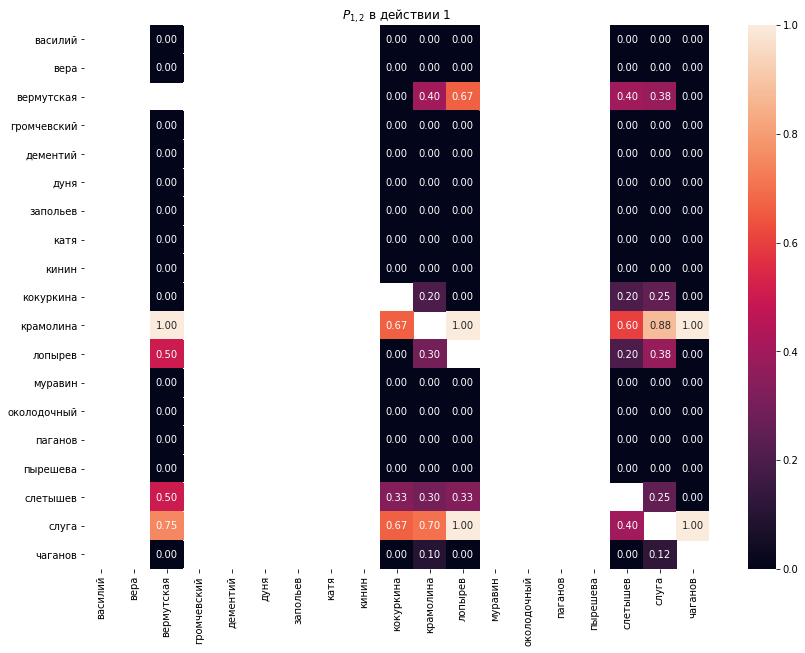

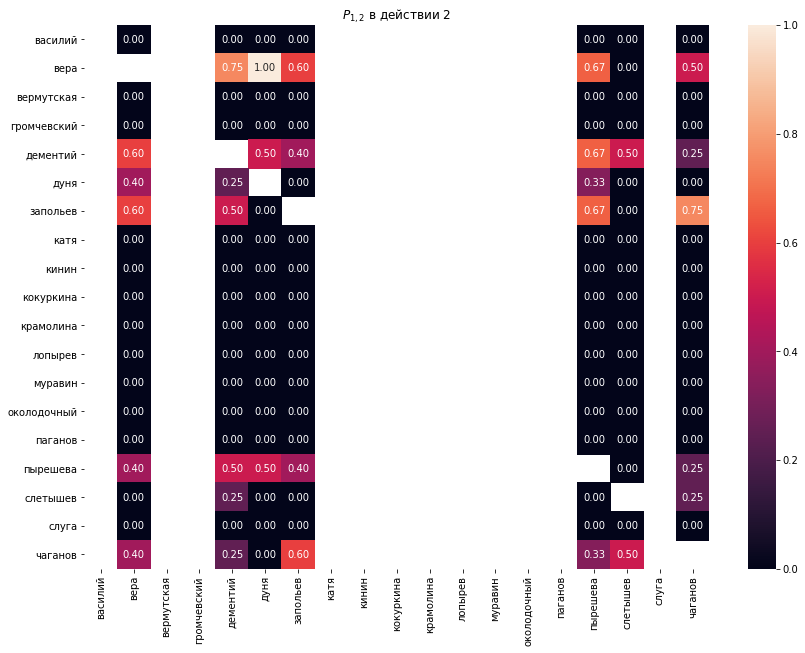

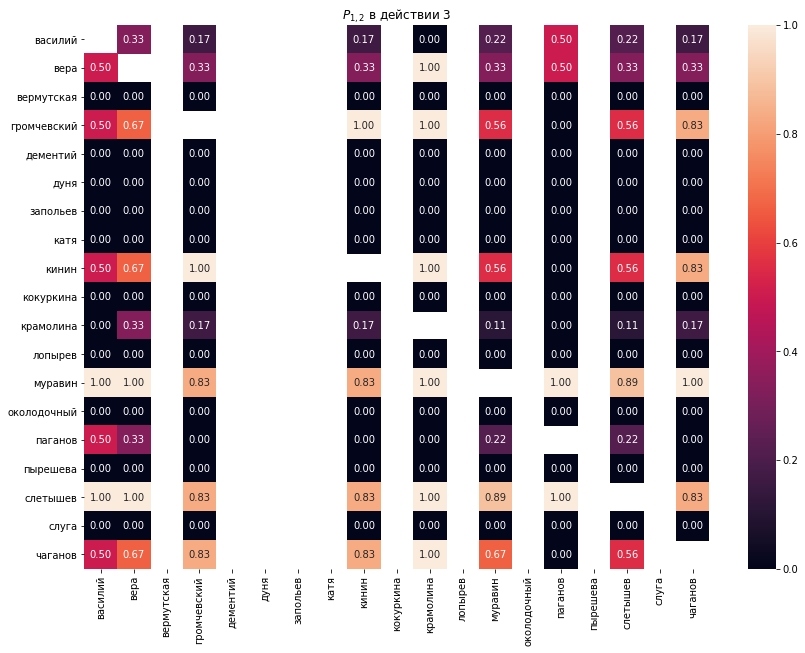

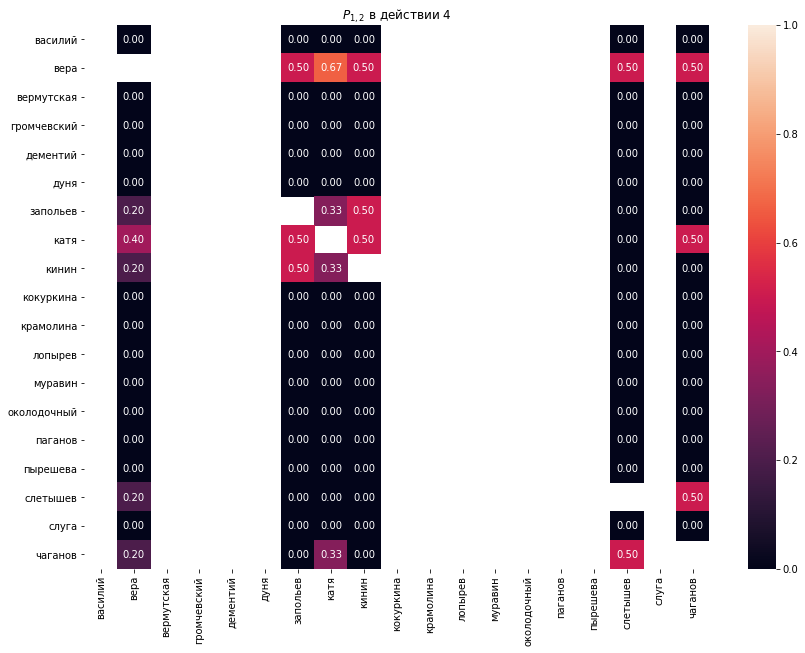

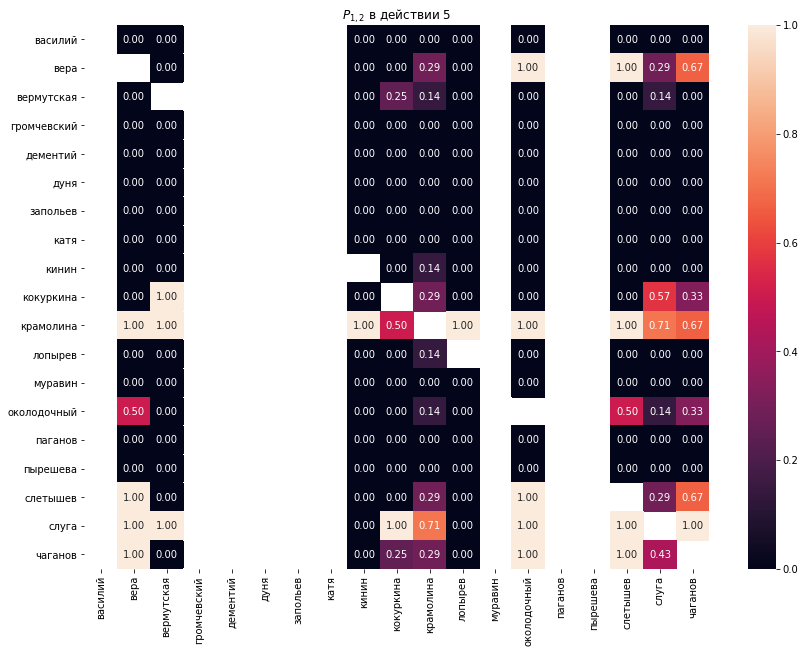

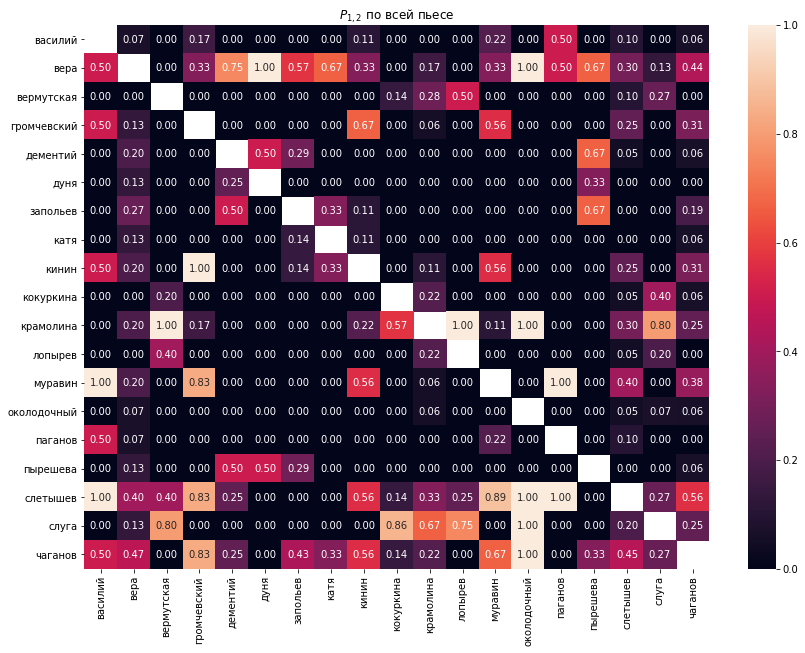

In [18]:
for i, m in enumerate(matrices):
    plt.subplots(figsize=(14, 10))
    sns.heatmap(rel_freq(m), vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
    plt.title(r"$P_{1,2}$ в действии " + str(i+1));

plt.subplots(figsize=(14, 10))
sns.heatmap(rel_freq(matrix), vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
plt.title(r"$P_{1,2}$ по всей пьесе");

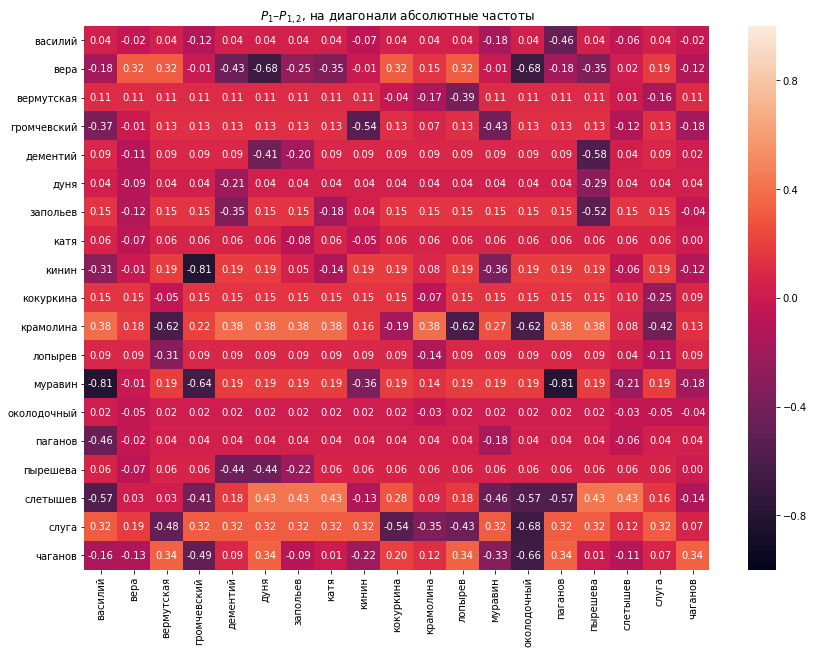

In [19]:
freq_abs = freq(matrix).reshape((-1, 1))
freq_rel = rel_freq(matrix)
freq_ = freq_abs - freq_rel
freq_[np.diag_indices(len(freq_[0]))] = freq_abs.ravel()
plt.subplots(figsize=(14, 10))
sns.heatmap(freq_, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f', vmin=-1, vmax=1)
plt.title(r"$P_1 – P_{1,2}$, на диагонали абсолютные частоты");